## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

In [1]:
import tweepy
import json
import pandas as pd
import requests
from io import StringIO
from timeit import default_timer as timer
import matplotlib.pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

### Insights:
1. Among the collected dataset, a remarkable trend emerges, showcasing the golden retriever as the frontrunner in terms of retweet count, commanding an impressive share of 7.78%. Following closely, in second place, is the Pembroke with a notable engagement rate of 5.4%. The third position is secured by the Labrador retriever, contributing a significant 4.55%. At the forefront of the subsequent tier, the Chihuahua claims the fourth spot with a robust 2.85% share. Wrapping up the roster of the top five, the Show dog captures the fifth position with a participation rate of 2.62%. Cumulatively, these figures amount to an overall total of 23.20%.

In [10]:
retweet_sum = twitter_archive_master.groupby('p1')['retweet_count'].sum()

# Calculate total retweet count
total_retweet_count = retweet_sum.sum()

# Calculate percentage participation
percentage_participation = (retweet_sum / total_retweet_count) * 100

# Create a dataframe with retweet sum and percentage participation
result_df = pd.DataFrame({
    'Retweet_Sum': retweet_sum,
    'Percentage_Participation': percentage_participation
})

# Sort the dataframe by Retweet_Sum in descending order and show the top 10
top_10_retweets = result_df.sort_values(by = 'Retweet_Sum'
                                       ,ascending = False).head(10)
top_10_retweets

,Retweet_Sum,Percentage_Participation
p1,,
golden_retriever,205921,7.781513
Pembroke,143397,5.418804
Labrador_retriever,119588,4.519090
Chihuahua,75642,2.858422
chow,69341,2.620315
pug,57012,2.154416
malamute,55592,2.100756
toy_poodle,50869,1.922280
Samoyed,50528,1.909394


2. Among the collected dataset, a remarkable trend emerges, showcasing the golden retriever as the frontrunner in terms of retweet count, commanding an impressive share of 8.31%. Following closely, in second place, is the Pembroke with a notable engagement rate of 5.44%. The third position is secured by the Labrador retriever, contributing a significant 4.61%. In contrast with tie retweet information, the Chow claims the fourth spot with a robust 2.67% share. Wrapping up the roster of the top five, the Chihuaua dog captures the fifth position with a participation rate of 2.65%. Cumulatively, these figures amount to an overall total of 23.51%.

In [6]:
favorite_sum = twitter_archive_master.groupby('p1')['favorite_count'].sum()

total_favorite_count = favorite_sum.sum()
percentage_participation = (favorite_sum / total_favorite_count) * 100
result_df = pd.DataFrame({'favorite_sum': favorite_sum
                         ,'Percentage_Participation': percentage_participation})
top_10_retweets = result_df.sort_values(by = 'favorite_sum'
                                       , ascending = False).head(10)
top_10_retweets

,favorite_sum,Percentage_Participation
p1,,
golden_retriever,759768,8.313158
Pembroke,497124,5.439384
Labrador_retriever,421773,4.614916
chow,244529,2.675564
Chihuahua,242730,2.655880
malamute,195498,2.139082
German_shepherd,165895,1.815174
pug,162572,1.778815
toy_poodle,160179,1.752631


3. "We have comprehensive information about tweet counts within two specific time ranges: from midnight until 6:20 AM, and from 1:00 PM until midnight. The first range has the most amount of tweets. However, we lack data for the time interval between 7:00 AM and 1:00 PM. One hypothesis suggests that these tweets originate from a very specific geographical location, which could explain the heightened activity during these time frames. Unfortunately, we do not possess geolocation data for the tweets to substantiate this hypothesis.

In [7]:
twitter_archive_master[(twitter_archive_master['hour'] <= '13:00:00') & (twitter_archive_master['hour'] >= '07:00:00')]

,tweet_id,timestamp,date,hour,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,full_text,display_text_range,text


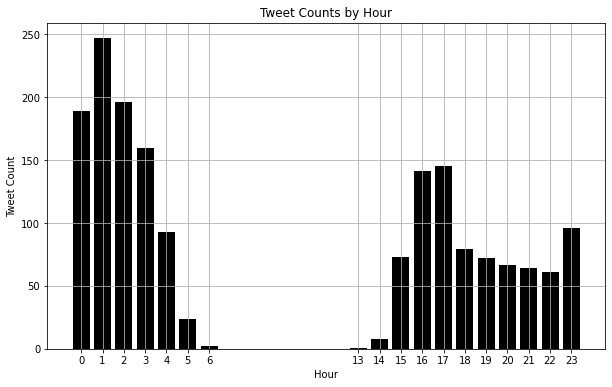

In [8]:
twitter_archive_master['hour_exacly'] = pd.to_datetime(twitter_archive_master['hour'], format='%H:%M:%S').dt.hour
hourly_counts = twitter_archive_master.groupby('hour_exacly').size()

plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='black')
plt.title('Tweet Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Tweet Count')
plt.xticks(hourly_counts.index)
plt.grid(True)
plt.show()

### Visualization

As evident from the time series, the highest volume of tweets was observed between November of 2015 and January of 2016. However, beginning in March of 2016, a gradual decline in engagement became discernible, continuing at a moderate pace until July of 2017.

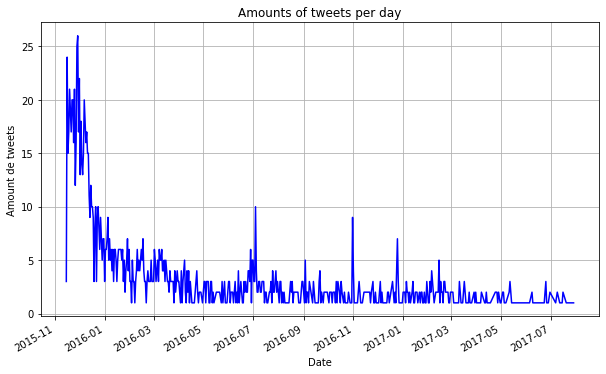

In [9]:
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

# Establece 'timestamp' como el índice
twitter_archive_master.set_index('timestamp', inplace=True)

# Cuenta la cantidad de registros para cada fecha
daily_counts = twitter_archive_master.groupby(twitter_archive_master.index.date).size()

# Convierte el índice de nuevo a un DatetimeIndex
daily_counts.index = pd.to_datetime(daily_counts.index)

# Plot de la serie de tiempo
plt.figure(figsize=(10, 6))
daily_counts.plot(color='blue')
plt.title('Amounts of tweets per day')
plt.xlabel('Date')
plt.ylabel('Amount de tweets')
plt.grid(True)
plt.show()